In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Convert to a DataFrame for easier visualization
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Display dataset information
print("Dataset Shape:", df.shape)
print("Feature Names:", feature_names)
df.head()

Dataset Shape: (150, 5)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


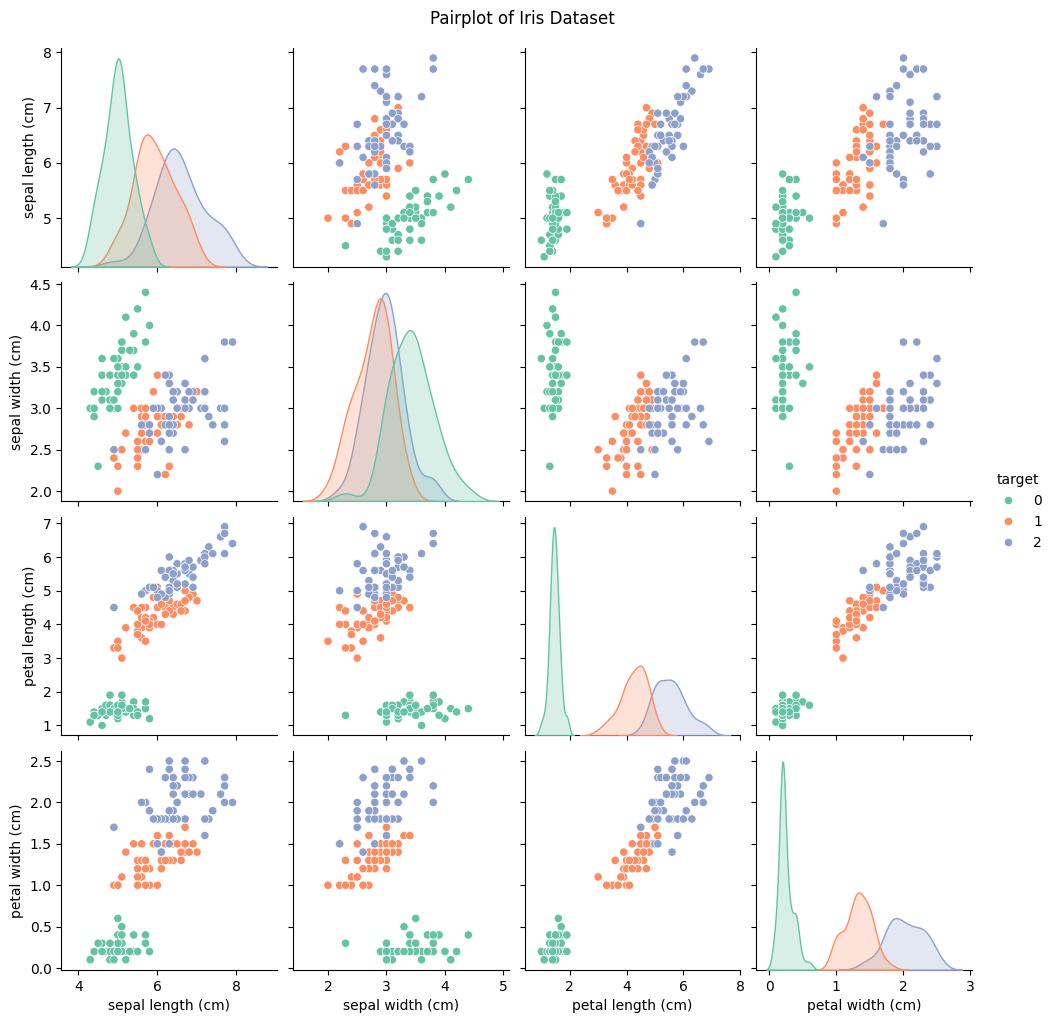

In [3]:
# Pairplot of the features
sns.pairplot(df, hue='target', diag_kind='kde', palette='Set2')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

Silhouette Score (Scikit-Learn K-Means): 0.55


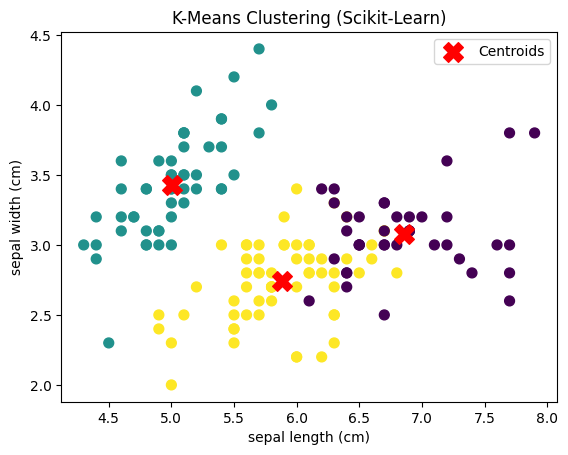

In [4]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Cluster labels
cluster_labels = kmeans.labels_

# Evaluate clustering performance
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score (Scikit-Learn K-Means): {silhouette_avg:.2f}")

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering (Scikit-Learn)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.show()

Silhouette Score (K-Means from Scratch): 0.55


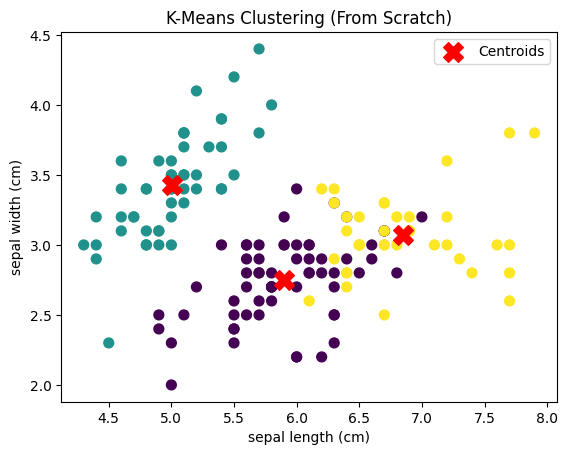

In [5]:
class KMeansScratch:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        np.random.seed(42)
        # Randomly initialize centroids
        random_indices = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.centroids = X[random_indices]

        for i in range(self.max_iter):
            # Assign clusters
            self.labels = self._assign_clusters(X)
            # Update centroids
            new_centroids = self._update_centroids(X)
            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X):
        return np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])

    def predict(self, X):
        return self._assign_clusters(X)

# Perform K-Means clustering from scratch
kmeans_scratch = KMeansScratch(n_clusters=3)
kmeans_scratch.fit(X)
cluster_labels_scratch = kmeans_scratch.predict(X)

# Evaluate clustering performance
silhouette_avg_scratch = silhouette_score(X, cluster_labels_scratch)
print(f"Silhouette Score (K-Means from Scratch): {silhouette_avg_scratch:.2f}")

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels_scratch, cmap='viridis', s=50)
plt.scatter(kmeans_scratch.centroids[:, 0], kmeans_scratch.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering (From Scratch)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.show()

In [6]:
# Create a comparison table
comparison = pd.DataFrame({
    "Implementation": ["Scikit-Learn", "From Scratch"],
    "Silhouette Score": [silhouette_avg, silhouette_avg_scratch]
})
print(comparison)

  Implementation  Silhouette Score
0   Scikit-Learn          0.551192
1   From Scratch          0.552819


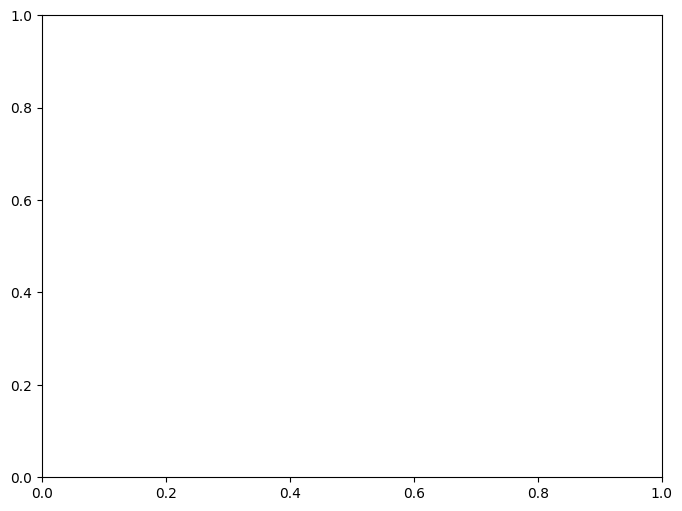

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization

# K-Means from Scratch with Animation
class KMeansAnimated:
    def __init__(self, n_clusters=3, max_iter=10):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None
        self.history = []  # To store centroids and labels at each step

    def fit(self, X):
        np.random.seed(42)
        # Randomly initialize centroids
        random_indices = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            # Assign clusters
            self.labels = self._assign_clusters(X)
            # Store current state for animation
            self.history.append((self.centroids.copy(), self.labels.copy()))
            # Update centroids
            new_centroids = self._update_centroids(X)
            # Check for convergence
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X):
        return np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])

# Initialize and fit the K-Means model
kmeans = KMeansAnimated(n_clusters=3, max_iter=10)
kmeans.fit(X)

# Create the animation
fig, ax = plt.subplots(figsize=(8, 6))

def update(frame):
    ax.clear()
    centroids, labels = kmeans.history[frame]
    for cluster in range(kmeans.n_clusters):
        cluster_points = X[labels == cluster]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    ax.set_title(f"K-Means Clustering - Step {frame + 1}")
    ax.legend()

ani = FuncAnimation(fig, update, frames=len(kmeans.history), interval=1000, repeat=False)
plt.show()

In [8]:
ani.save("kmeans_clustering.gif", writer="imagemagick")

MovieWriter imagemagick unavailable; using Pillow instead.
